# K-means Cluster

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data/mall.csv")

In [3]:
df

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


In [4]:
'''
mall.csv have data of customers income and expenses on based of those data we can 
make customer sengmentation and for that we are using k-means cluster

'''

'\nmall.csv have data of customers income and expenses on based of those data we can \nmake customer sengmentation and for that we are using k-means cluster\n\n'

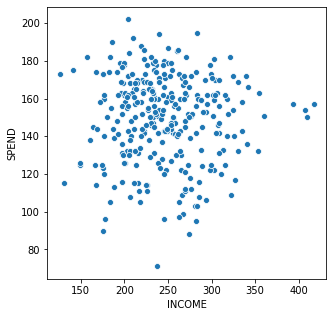

In [5]:
plt.figure(figsize=(5,5))
sns.scatterplot(df["INCOME"],df["SPEND"])
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
ke1=KMeans(n_clusters=3,init="k-means++",n_init=10,max_iter=300,random_state=1)
ke1.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [8]:
ke1.inertia_

297101.3764201943

In [9]:
#get list of all centroids
centroids = ke1.cluster_centers_ #(current positition of centroid in x,y it is giving)

In [10]:
centroids

array([[317.55      , 148.73333333],
       [196.68224299, 150.57943925],
       [251.61764706, 149.31617647]])

In [11]:
#now we have x as well as y for centeroid in dataframe
centroid_df = pd.DataFrame(centroids,columns=["X","Y"])

In [12]:
centroid_df

,X,Y
0,317.550000,148.733333
1,196.682243,150.579439
2,251.617647,149.316176


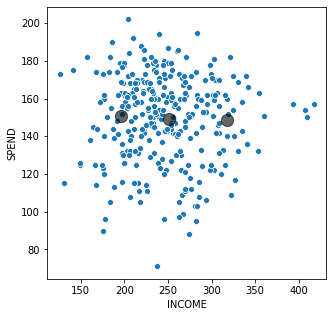

In [13]:
#plot data with centroid to understand what happen
plt.figure(figsize=(5,5))
sns.scatterplot(df["INCOME"],df["SPEND"])
plt.scatter(centroid_df["X"],centroid_df["Y"], c='black',s=150, alpha=0.6);
plt.show()

# k value and elbow methods 

In [14]:
bcss =[] #between cluster sum of square distance
for k in range(1,10):
    ke2=KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=300,random_state=1)
    ke2.fit(df)
    bcss.append(ke2.inertia_)

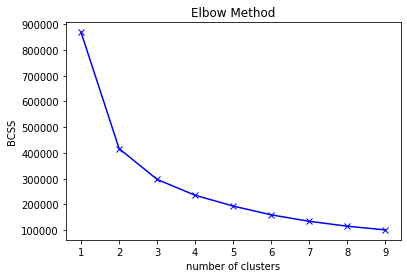

In [15]:
#plot elbow
plt.plot(range(1,10),bcss,'bx-')
plt.title("Elbow Method")
plt.xlabel("number of clusters")
plt.ylabel("BCSS")
plt.show()

In [16]:
ke3 = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300,random_state=1)

In [17]:
#we got common between data on based of clusters
labels = ke3.fit_predict(df)

In [18]:
#calculate inertia
ke3.inertia_

193593.3586522168

In [19]:
centroids = ke3.cluster_centers_
centroids

array([[248.97196262, 158.82242991],
       [271.64705882, 114.94117647],
       [194.68085106, 125.70212766],
       [321.34615385, 153.23076923],
       [199.71428571, 167.6984127 ]])

In [20]:
centroid_df = pd.DataFrame(centroids,columns=["X","Y"])
centroid_df

,X,Y
0,248.971963,158.822430
1,271.647059,114.941176
2,194.680851,125.702128
3,321.346154,153.230769
4,199.714286,167.698413


In [21]:
np.unique(labels) # iahev created 5 clusters so i am getting 5 label 

array([0, 1, 2, 3, 4])

In [22]:
labels

array([0, 0, 4, 0, 3, 4, 3, 0, 4, 4, 0, 1, 0, 2, 0, 4, 3, 2, 0, 0, 0, 0,
       4, 0, 4, 3, 4, 2, 3, 4, 4, 2, 4, 0, 2, 4, 3, 0, 0, 3, 3, 0, 4, 0,
       3, 3, 0, 0, 2, 0, 0, 3, 0, 4, 0, 4, 4, 0, 4, 3, 1, 3, 4, 2, 4, 4,
       0, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 4, 4, 0, 0, 3, 3, 3, 1, 0, 0, 4,
       4, 1, 0, 4, 4, 3, 2, 2, 3, 0, 3, 0, 0, 0, 4, 0, 4, 2, 0, 0, 0, 0,
       3, 4, 3, 4, 0, 4, 4, 4, 4, 0, 1, 0, 0, 0, 4, 4, 2, 0, 4, 1, 4, 0,
       3, 0, 3, 0, 2, 2, 2, 1, 3, 3, 4, 0, 2, 0, 0, 0, 0, 4, 0, 2, 0, 0,
       4, 2, 0, 4, 4, 4, 0, 3, 4, 4, 4, 1, 2, 0, 0, 4, 0, 0, 0, 4, 2, 2,
       0, 3, 2, 1, 3, 2, 3, 0, 0, 3, 0, 1, 0, 4, 3, 2, 2, 1, 4, 3, 0, 0,
       1, 0, 4, 0, 1, 0, 2, 0, 0, 0, 2, 4, 0, 0, 2, 3, 0, 3, 1, 3, 1, 0,
       3, 2, 0, 1, 0, 2, 1, 2, 3, 3, 0, 1, 3, 1, 3, 3, 3, 3, 3, 0, 1, 0,
       2, 1, 2, 0, 3, 1, 0, 0, 1, 0, 1, 1, 1, 3, 1, 2, 0, 0, 0, 0, 1, 0,
       2, 2, 3, 2, 1, 1, 0, 0, 1, 0, 1, 4, 2, 0, 3, 2, 3, 4, 2, 4, 2, 3,
       4, 0, 3, 2, 4, 3, 0, 4, 2, 2, 2, 2, 1, 1, 2,

In [23]:
final_df=pd.concat([df,pd.DataFrame({'Labels':labels})],axis=1)

In [24]:
final_df

,INCOME,SPEND,Labels
0,233,150,0
1,250,187,0
2,204,172,4
3,236,178,0
4,354,163,3
...,...,...,...
298,241,123,1
299,264,132,1
300,193,141,2
301,131,115,2


In [25]:
final_df['Labels'].value_counts()

0    107
4     63
3     52
2     47
1     34
Name: Labels, dtype: int64

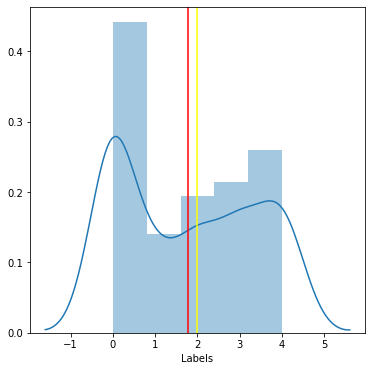

In [26]:
plt.figure(figsize=(6,6))
sns.distplot(final_df["Labels"])
plt.axvline(final_df["Labels"].mean(),color="red")
plt.axvline(final_df["Labels"].median(),color="yellow")
plt.show()

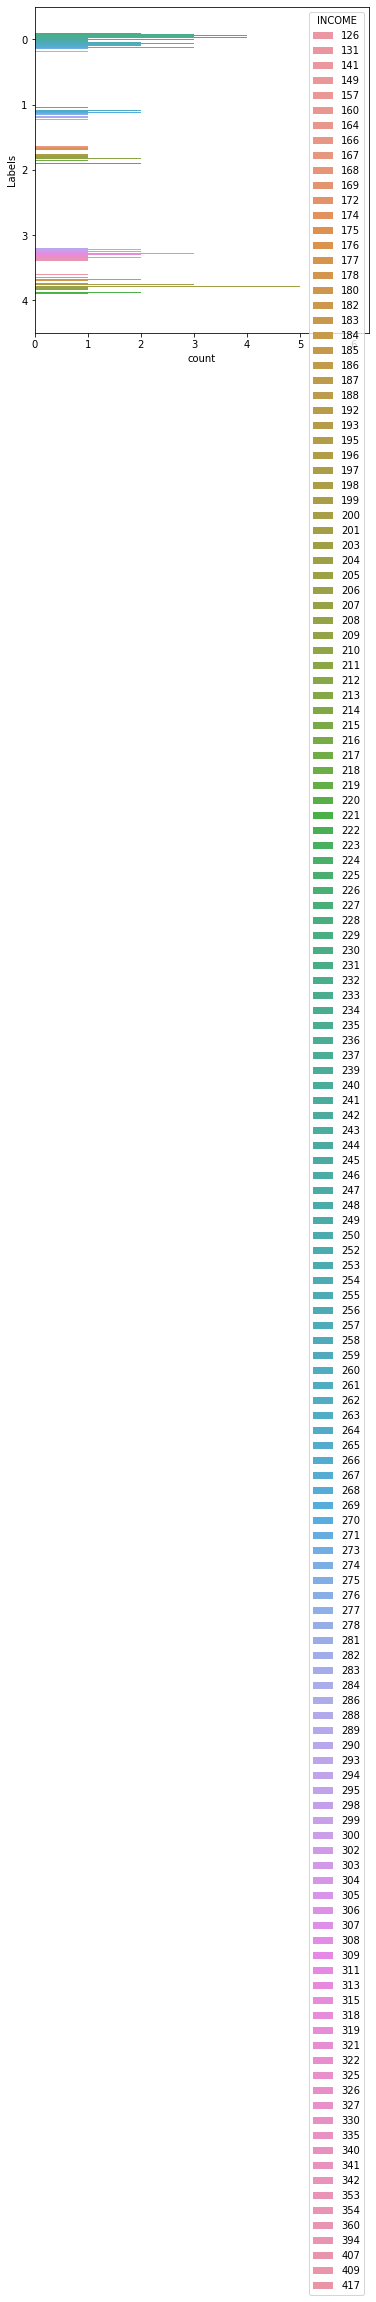

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(data=final_df,y=final_df["Labels"],hue=final_df['INCOME'])
plt.show()

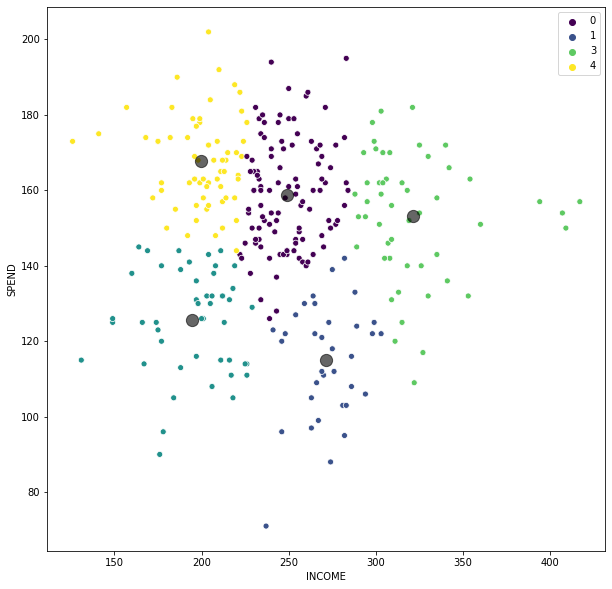

In [33]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=final_df["INCOME"],y=final_df["SPEND"],hue=labels,palette="viridis")
plt.scatter(centroid_df["X"],centroid_df["Y"], c='black',s=150, alpha=0.6);
plt.show()

In [34]:
'''
clustering nor performing well because variance between cluster is less 
'''

'\nclustering nor performing well because variance between cluster is less \n'